# PART 4-4 < Cluster 기반 Mapping : 콘서트, 실내악, 클래식 >

- 본 팀은 콘서트, 실내악, 클래식의 장르 유사성에 따른 선호도 기반 재배치 결과가 유사할 것으로 판단하여 대표적으로 '콘서트' 장르에 대한 'Cluster 기반 좌석 Mapping' 을 실시하고, 그와 동일한 프로세스를 실내악과 클래식에 대응하고자 한다. 

# Import

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import warnings
warnings.filterwarnings("ignore")

In [2]:
data_solo = pd.read_csv('data/concert_콘서트_code3.csv')

# 분포 시각화 및 Mapping 을 위한 테이블 분할 (콘서트)

In [3]:
# little preprocessing 

data_solo = data_solo.iloc[:,1:]
data_solo['열'] = data_solo['열'].str.replace('열', '')
data_solo = data_solo[~data_solo['열'].isin(['box'])]
data_solo['열'] = data_solo['열'].fillna(0)
data_solo['열'] = data_solo['열'].astype('int')

In [4]:
# 박스 별 구분 

solo_C = data_solo[data_solo['블록(박스)'] == 'C']
solo_B = data_solo[data_solo['블록(박스)'] == 'B']
solo_D = data_solo[data_solo['블록(박스)'] == 'D']
solo_A = data_solo[data_solo['블록(박스)'] == 'A']
solo_E = data_solo[data_solo['블록(박스)'] == 'E']
solo_G = data_solo[data_solo['블록(박스)'] == 'G']
solo_M = data_solo[data_solo['블록(박스)'] == 'M']
solo_F = data_solo[data_solo['블록(박스)'] == 'F']
solo_N = data_solo[data_solo['블록(박스)'] == 'N']

In [5]:
# 해당 박스의 층별 구분 
solo_C_f1 = solo_C[solo_C['층'] == 1]
solo_C_f2 = solo_C[solo_C['층'] == 2]
solo_C_f3 = solo_C[solo_C['층'] == 3]

solo_B_f1 = solo_B[solo_B['층'] == 1]
solo_B_f2 = solo_B[solo_B['층'] == 2]
solo_B_f3 = solo_B[solo_B['층'] == 3]

solo_D_f1 = solo_D[solo_D['층'] == 1]
solo_D_f2 = solo_D[solo_D['층'] == 2]
solo_D_f3 = solo_D[solo_D['층'] == 3]

solo_A_f1 = solo_A[solo_A['층'] == 1]
solo_A_f2 = solo_A[solo_A['층'] == 2]
solo_A_f3 = solo_A[solo_A['층'] == 3]

solo_E_f1 = solo_E[solo_E['층'] == 1]
solo_E_f2 = solo_E[solo_E['층'] == 2]
solo_E_f3 = solo_E[solo_E['층'] == 3]

solo_G_f1 = solo_G[solo_G['층'] == 1]
solo_G_f2 = solo_G[solo_G['층'] == 2]
solo_G_f3 = solo_G[solo_G['층'] == 3]

solo_M_f1 = solo_M[solo_M['층'] == 1]
solo_M_f2 = solo_M[solo_M['층'] == 2]
solo_M_f3 = solo_M[solo_M['층'] == 3]

solo_F_f1 = solo_F[solo_F['층'] == 1]
solo_F_f2 = solo_F[solo_F['층'] == 2]
solo_F_f3 = solo_F[solo_F['층'] == 3]

solo_N_f1 = solo_N[solo_N['층'] == 1]
solo_N_f2 = solo_N[solo_N['층'] == 2]
solo_N_f3 = solo_N[solo_N['층'] == 3]

# 분포 시각화

**나누어진 테이블 기반 시각화**

- 클러스터별 '열' 선호도 시각화

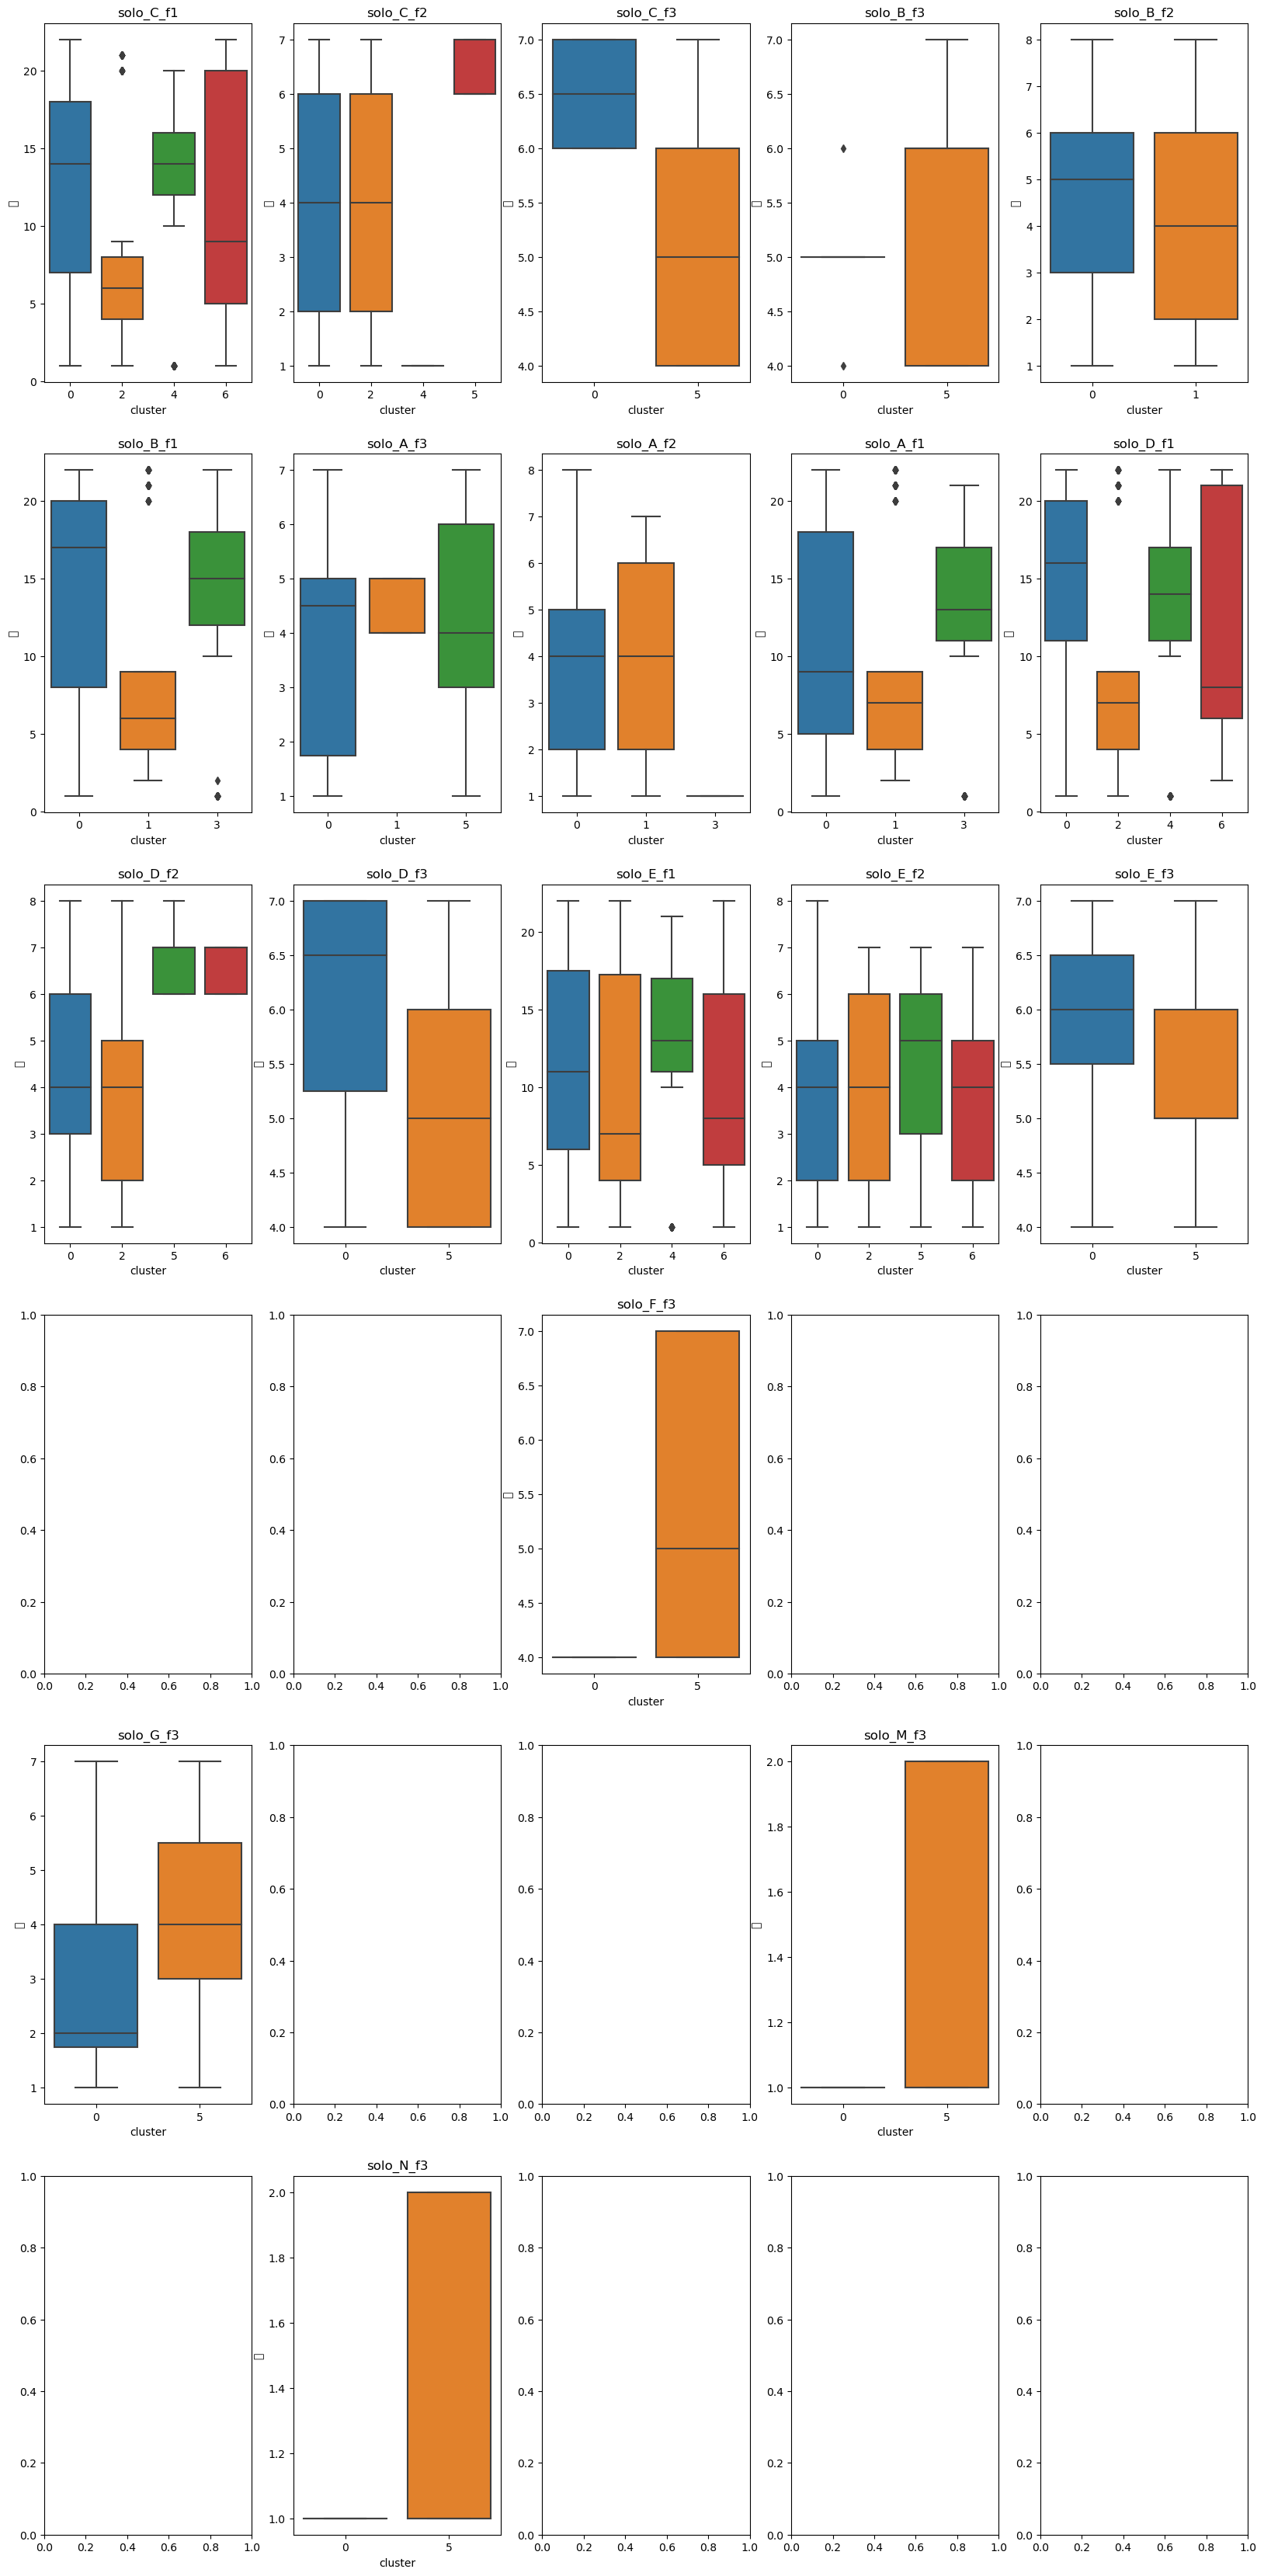

In [6]:
# visualizing 
datas = [solo_C_f1,solo_C_f2,solo_C_f3,solo_B_f3,solo_B_f2,solo_B_f1,solo_A_f3,solo_A_f2,solo_A_f1,solo_D_f1,solo_D_f2,solo_D_f3,
         solo_E_f1,solo_E_f2,solo_E_f3,solo_F_f1,solo_F_f2,solo_F_f3,solo_G_f1,solo_G_f2,solo_G_f3,solo_M_f1,solo_M_f2,solo_M_f3,
         solo_N_f1,solo_N_f2,solo_N_f3]
datas_title = ['solo_C_f1','solo_C_f2','solo_C_f3','solo_B_f3','solo_B_f2','solo_B_f1','solo_A_f3','solo_A_f2','solo_A_f1','solo_D_f1','solo_D_f2','solo_D_f3',
         'solo_E_f1','solo_E_f2','solo_E_f3','solo_F_f1','solo_F_f2','solo_F_f3','solo_G_f1','solo_G_f2','solo_G_f3','solo_M_f1','solo_M_f2','solo_M_f3',
         'solo_N_f1','solo_N_f2','solo_N_f3']

col_n = 5
row_n = 6

fig, ax = plt.subplots(ncols=col_n, nrows=row_n, figsize=(20,row_n*7))

n = 0
for i in  range(len(datas)):
    if len(datas[i]) != 0:
        p = sns.boxplot(y='열',x='cluster',data=datas[i], ax=ax[int(n/col_n),int(n%col_n)])
        p.set_title(datas_title[i])
    n+=1

- 클러스터별 '행'(자리번호) 선호도 시각화

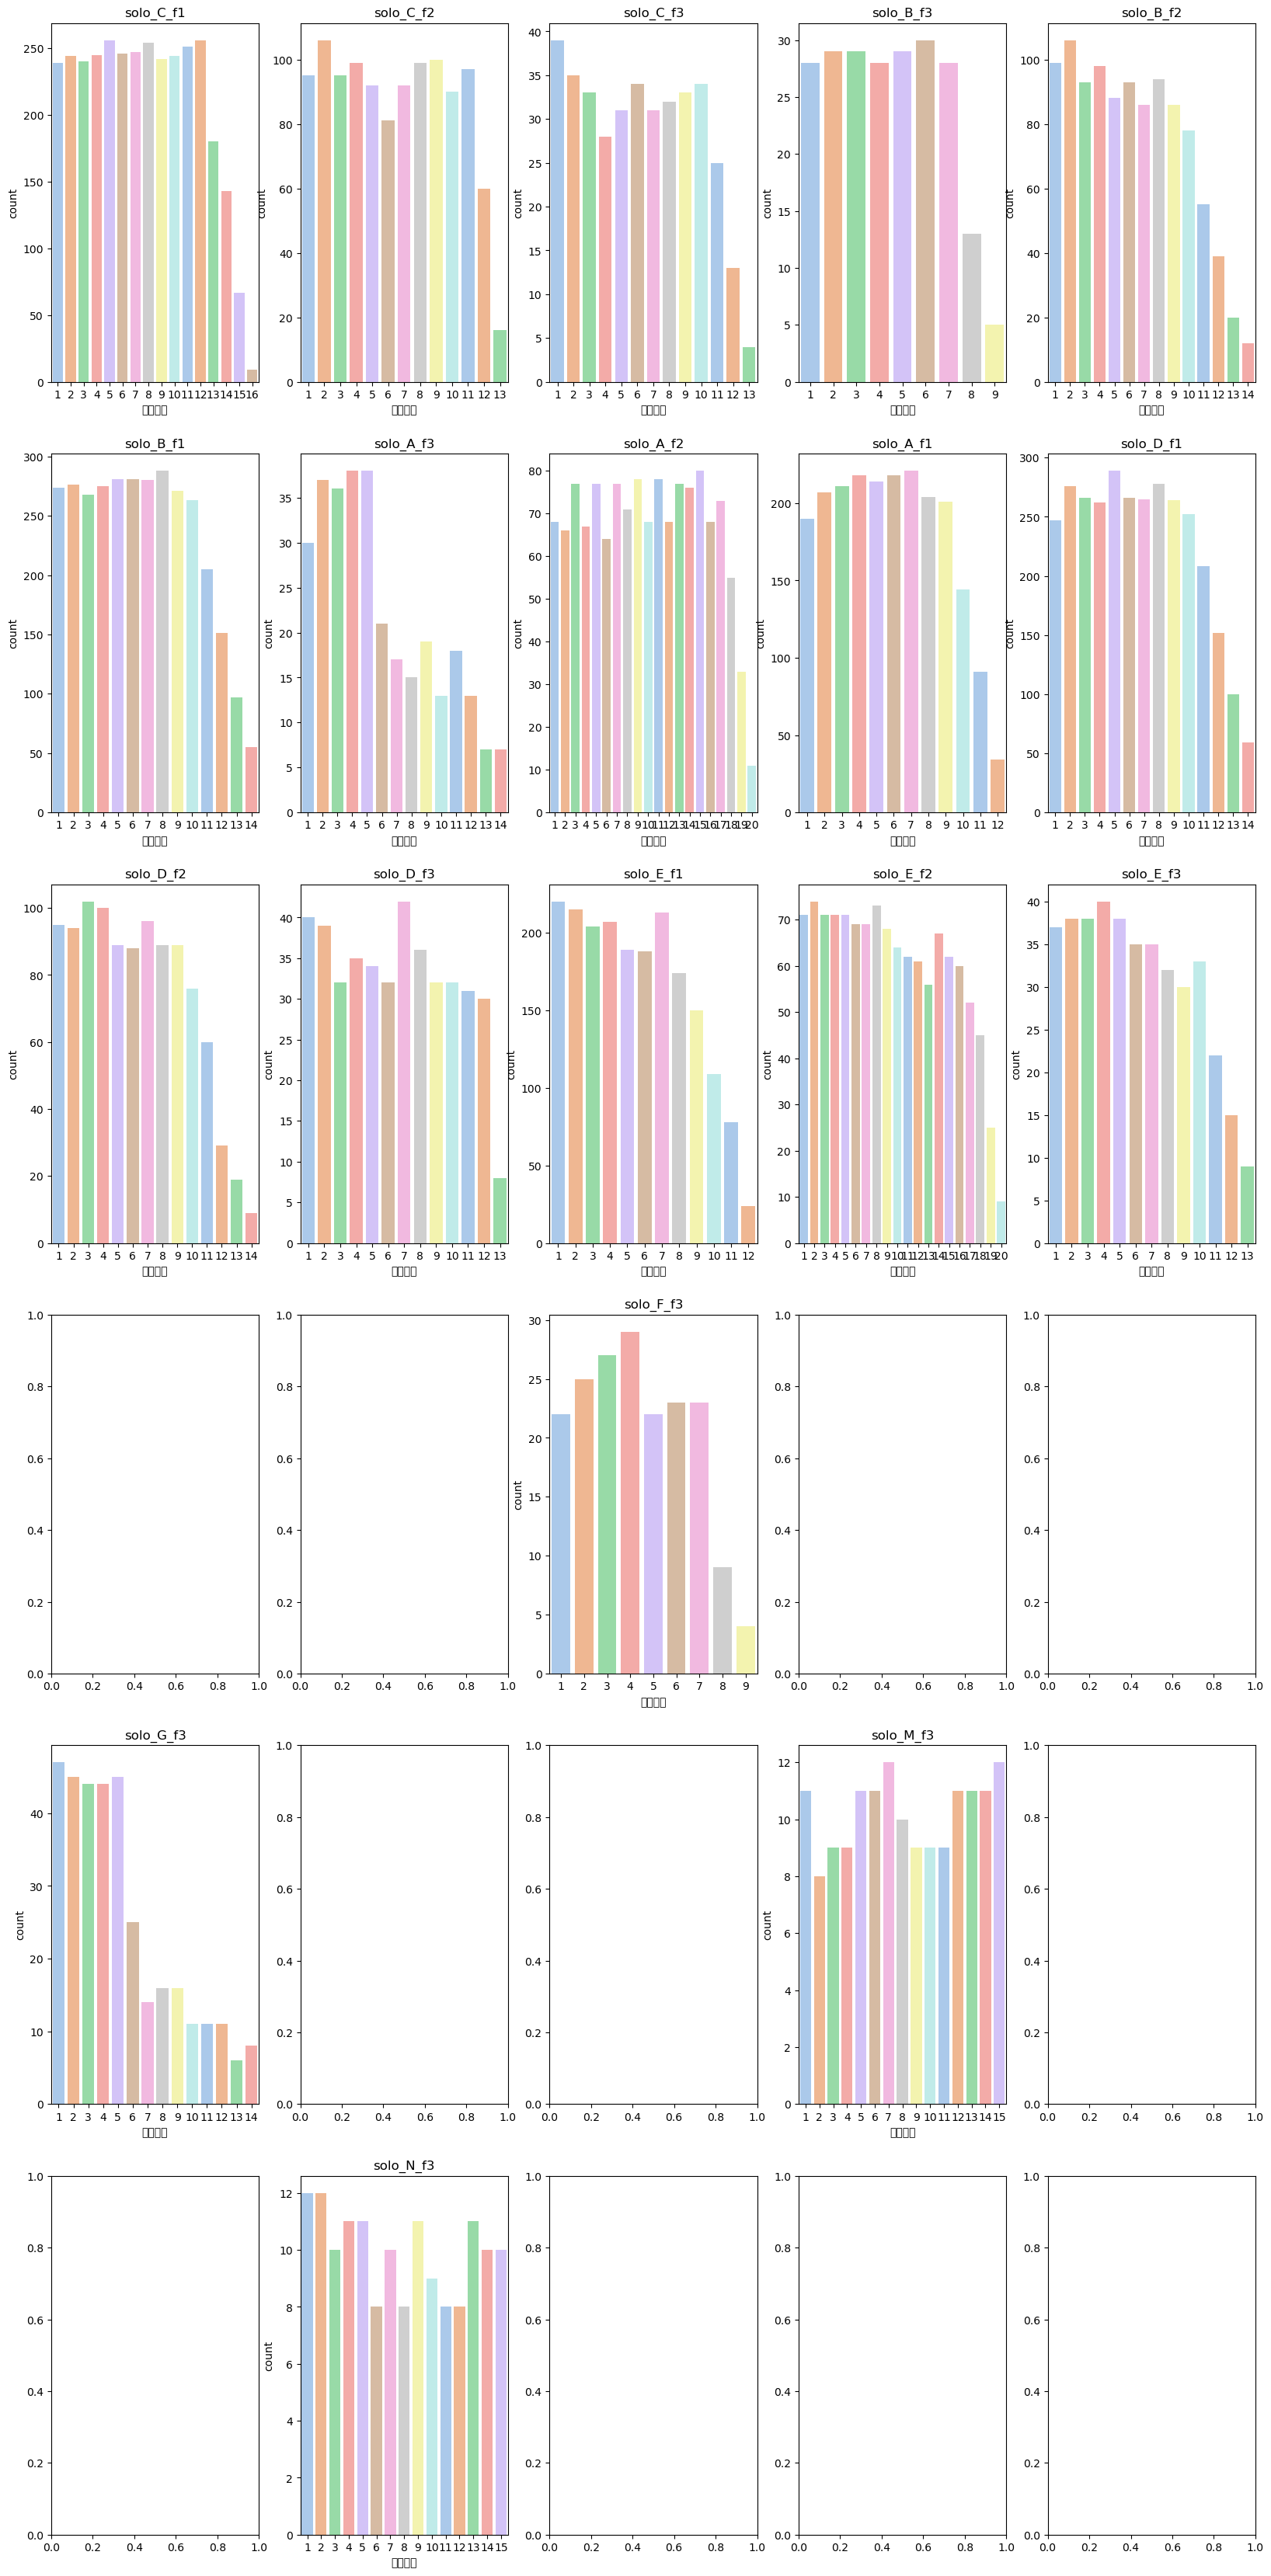

In [7]:
col_n = 5
row_n = 6

fig, ax = plt.subplots(ncols=col_n, nrows=row_n, figsize=(20,row_n*7))
n = 0
for i in  range(len(datas)):
    if len(datas[i]) != 0:
        p = sns.countplot(x='자리번호',data=datas[i], ax=ax[int(n/col_n),int(n%col_n)],palette='pastel')
        p.set_title(datas_title[i])
    n+=1

# Mapping 
- 위 분포 시각화를 통해 콘서트홀 좌석배치표에 맵핑
- 해당 맵핑 결과를 기반으로 데이터 라벨링

## 1 층

In [8]:
solo_C_f1['excel'] = solo_C_f1['열'].apply(lambda x: 1 if x < 8 else (2 if 8<= x <= 16 else 3))

In [9]:
solo_D_f1['excel'] =  solo_D_f1['열'].apply(lambda x: 1 if x < 8 else(2 if 8<= x <= 17 else 3))

In [10]:
solo_E_f1['excel'] = solo_E_f1['자리번호'].apply(lambda x: 3 if x <=6 else 4 )

In [11]:
a = solo_E_f1['열'] <= 9
b = solo_E_f1['자리번호'] <=2

In [12]:
solo_E_f1.loc[a&b,'excel'] = 2

In [13]:
solo_B_f1['excel'] =  solo_B_f1['열'].apply(lambda x: 1 if x < 8 else(2 if 8<= x <= 17 else 3))

In [14]:
solo_A_f1['excel'] = solo_A_f1['자리번호'].apply(lambda x: 4 if x <=4 else 3 )

In [15]:
a = solo_A_f1['열'] <= 9
b = 1<=solo_A_f1['열'] 
c = solo_A_f1['자리번호'] <=9
d = 8 <= solo_A_f1['자리번호'] 

In [16]:
solo_A_f1.loc[a&b&c&d,'excel']= 2

## 2 층

In [17]:
solo_C_f2['excel'] =  solo_C_f2['열'].apply(lambda x: 2 if x <=2 else(3 if 2<= x <=5 else 4))

In [18]:
solo_D_f2['excel'] =  solo_D_f2['열'].apply(lambda x: 2 if x <=2 else(3 if 2<= x <=5 else 4))

In [19]:
solo_B_f2['excel'] =  solo_B_f2['열'].apply(lambda x: 2 if x <=2 else(3 if 2<= x <=5 else 4))

In [20]:
solo_E_f2['excel'] = solo_E_f2['자리번호'].apply(lambda x: 4 if x <= 14 else 5)

In [21]:
a = 5<=solo_E_f2['열']
b = 15 <= solo_E_f2['자리번호']

In [22]:
solo_E_f2.loc[a&b,'excel' ] = 6

In [23]:
solo_A_f2['excel'] =solo_A_f2['자리번호'].apply(lambda x: 5 if x <= 5 else 4)

In [24]:
a = 5<=solo_A_f2['열']
b = solo_A_f2['자리번호'] <=4

In [25]:
solo_A_f2.loc[a&b,'excel' ] = 6

## 3 층

In [26]:
solo_D_f3['excel'] = solo_D_f3['열'].apply(lambda x: 4 if x <=5 else 5)

In [27]:
solo_B_f3['excel'] = 5

In [28]:
solo_C_f3['excel'] = solo_C_f3['자리번호'].apply(lambda x: 5 if x <=3 else 4)

In [29]:
a = solo_A_f3['자리번호'] <= 9
b = solo_A_f3['열'] <= 4

In [30]:
solo_A_f3['excel'] = solo_A_f3.loc[a&b,'excel'] = 6

In [31]:
solo_A_f3['excel'] = solo_A_f3.loc[~(a&b),'excel'] = 5

In [32]:
solo_E_f3['excel'] = solo_E_f3['자리번호'].apply(lambda x: 4 if x <= 8 else 5)

In [33]:
solo_F_f3['excel'] = 5

In [34]:
solo_G_f3['excel'] = solo_G_f3['자리번호'].apply(lambda x: 5 if x <= 5 else 6)

In [35]:
solo_M_f3['excel'] = 6

In [36]:
solo_N_f3['excel'] = 6

In [37]:
ddff = pd.concat([solo_A_f1,solo_A_f2])
ddff = pd.concat([ddff,solo_A_f3])
ddff = pd.concat([ddff,solo_B_f1])
ddff = pd.concat([ddff,solo_B_f2])
ddff = pd.concat([ddff,solo_B_f3])
ddff = pd.concat([ddff,solo_C_f1])
ddff = pd.concat([ddff,solo_C_f2])
ddff = pd.concat([ddff,solo_C_f3])
ddff = pd.concat([ddff,solo_D_f1])
ddff = pd.concat([ddff,solo_D_f2])
ddff = pd.concat([ddff,solo_D_f3])
ddff = pd.concat([ddff,solo_E_f1])
ddff = pd.concat([ddff,solo_E_f2])
ddff = pd.concat([ddff,solo_E_f3])
ddff = pd.concat([ddff,solo_F_f3])
ddff = pd.concat([ddff,solo_G_f3])
ddff = pd.concat([ddff,solo_M_f3])
ddff = pd.concat([ddff,solo_N_f3])

In [38]:
ddff = ddff.sort_index()

In [39]:
ddff.to_csv('data/콘서트_라벨_code4.csv', index = False, encoding='utf-8-sig')